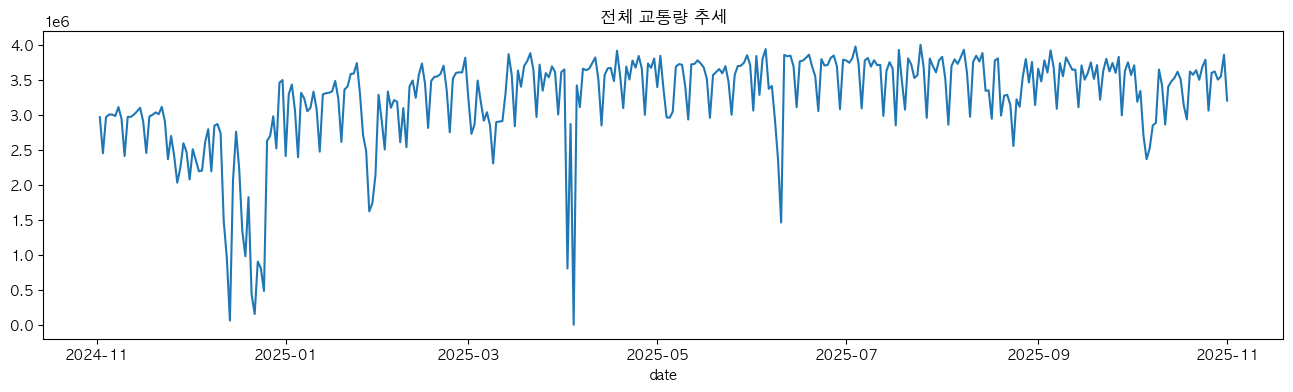

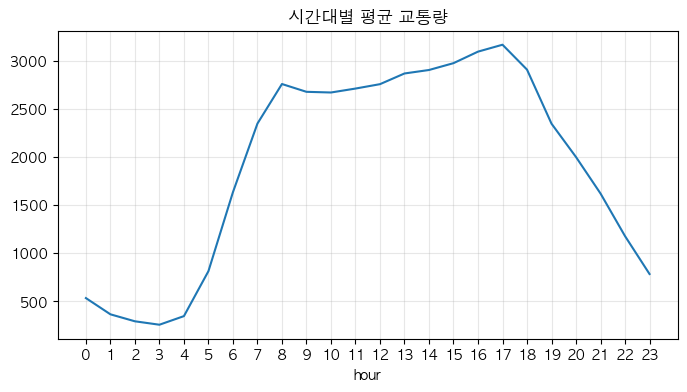

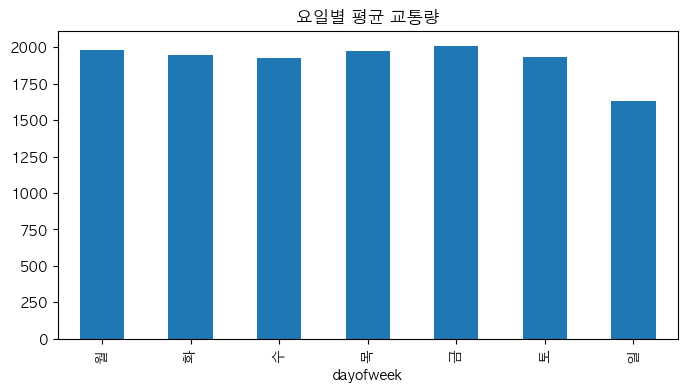

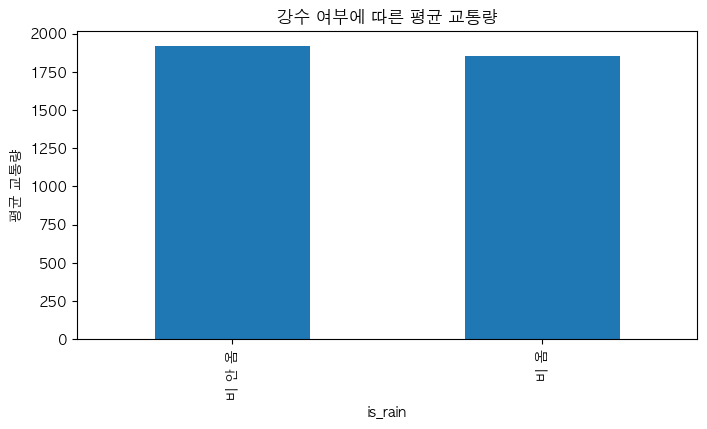

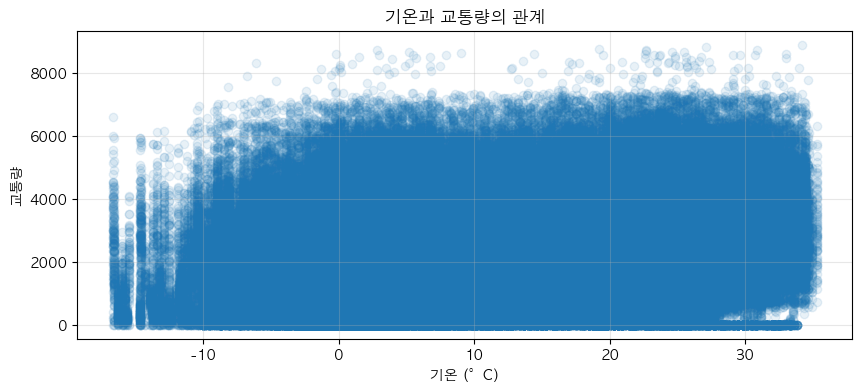

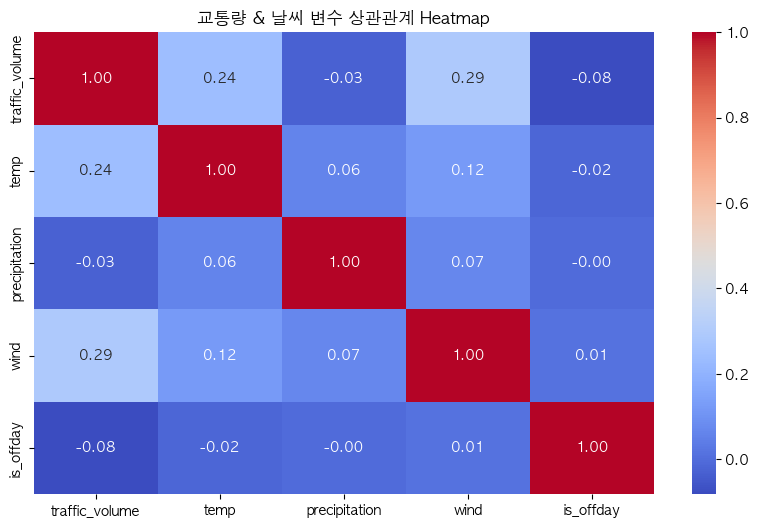

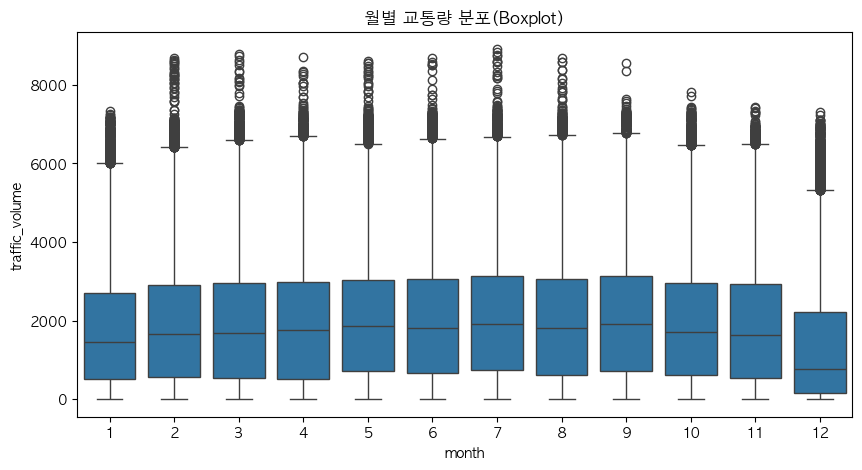

<Figure size 800x400 with 0 Axes>

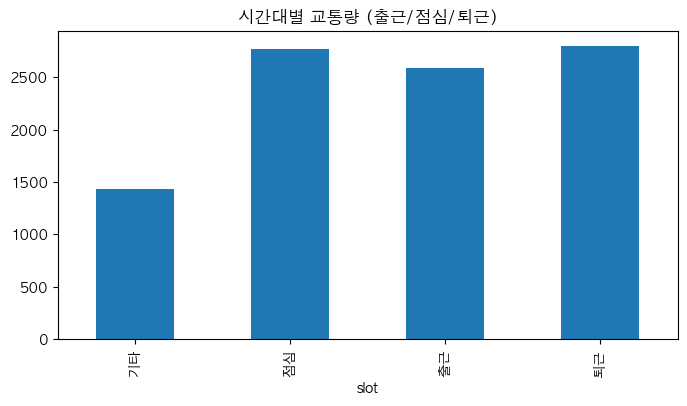

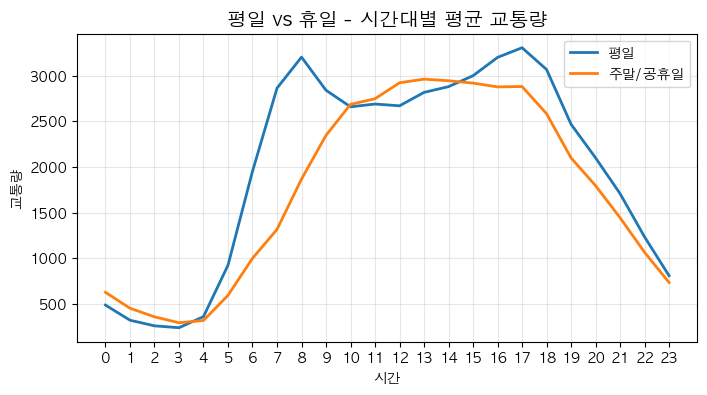

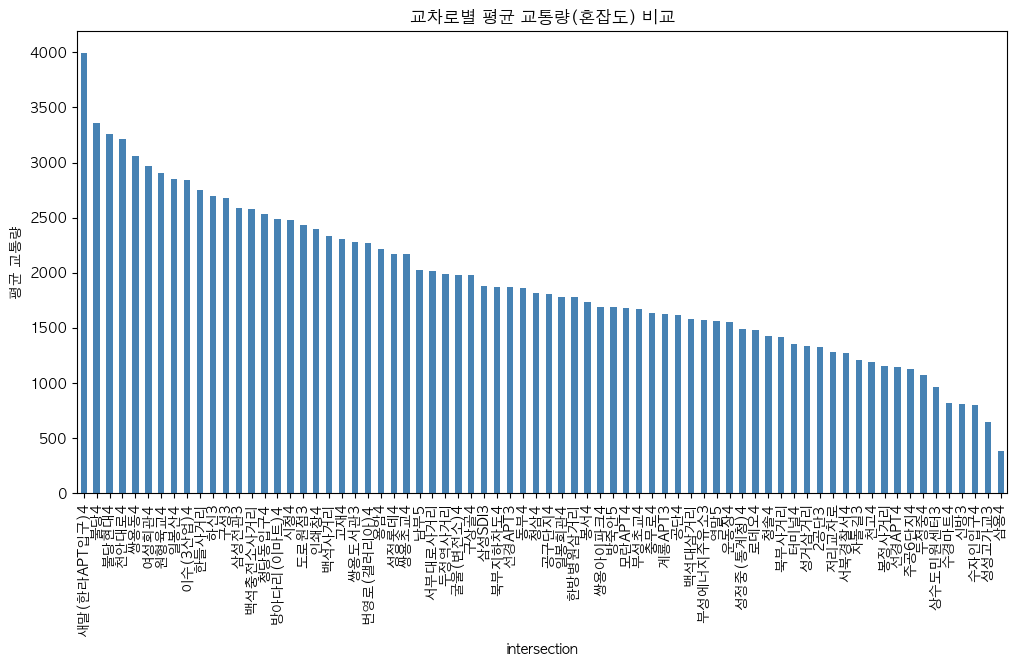

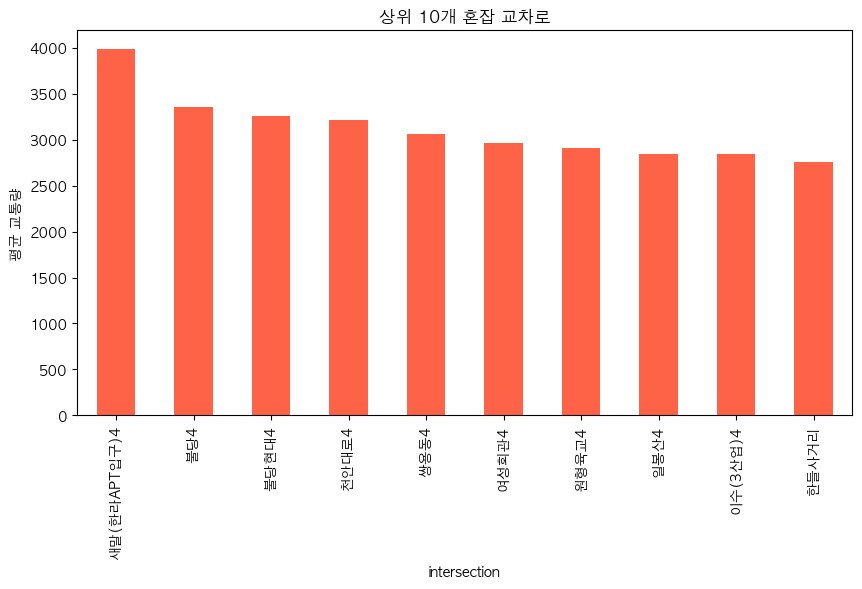

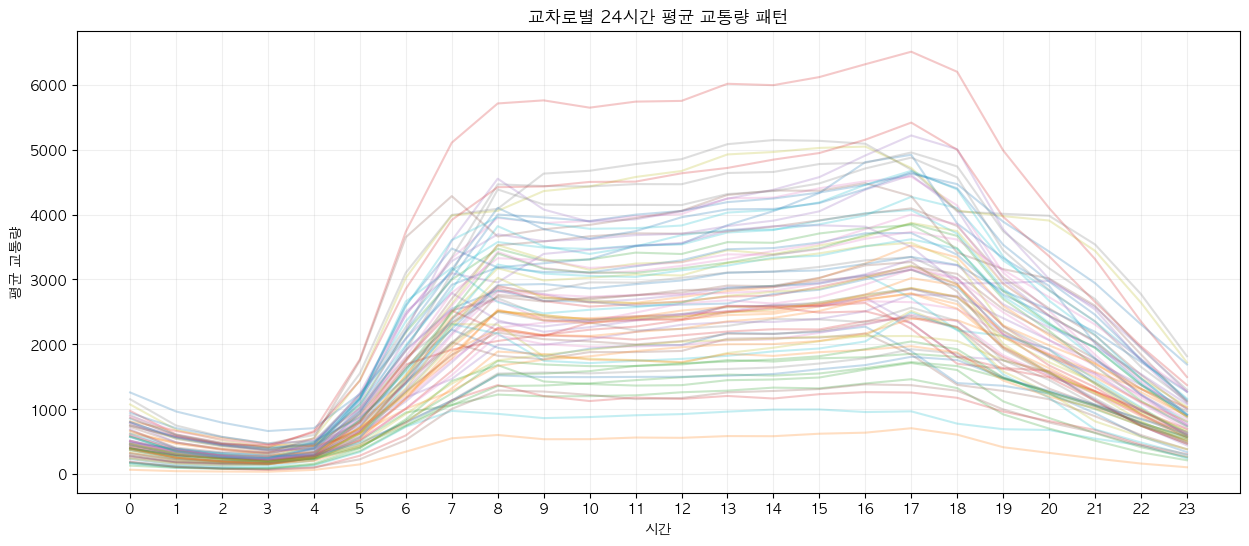

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

df = pd.read_csv("../data/merged/traffic_weather_merged.csv")

# ------------------------
# datetime 파싱(파생변수 생성)
# ------------------------
df['datetime'] = pd.to_datetime(df['datetime'])

df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

# ------------------------
# 전체 교통량 추세
# ------------------------
df.groupby('date')['traffic_volume'].sum().plot(figsize=(16,4))
plt.title("전체 교통량 추세")
plt.show()

# ------------------------
# 시간대별 평균 교통량
# ------------------------
plt.figure(figsize=(8,4))
df.groupby('hour')['traffic_volume'].mean().plot()
plt.title("시간대별 평균 교통량")
plt.xticks(range(24))
plt.grid(alpha=0.3)
plt.show()

# ------------------------
# 요일별 평균 교통량
# ------------------------
plt.figure(figsize=(8,4))
df.groupby('dayofweek')['traffic_volume'].mean().plot(kind='bar')
plt.title("요일별 평균 교통량")
plt.xticks(range(7), ["월","화","수","목","금","토","일"])
plt.show()

# ------------------------
# 비가 오는 날 vs 안 오는 날 교통량
# ------------------------
df['is_rain'] = df['precipitation'] > 0

plt.figure(figsize=(8,4))
df.groupby('is_rain')['traffic_volume'].mean().plot(kind='bar')
plt.xticks([0,1], ["비 안 옴", "비 옴"])
plt.ylabel("평균 교통량")
plt.title("강수 여부에 따른 평균 교통량")
plt.show()

# ------------------------
# 기온(temp)과 교통량 관계 (산점도)
# ------------------------
plt.figure(figsize=(10,4))
plt.scatter(df['temp'], df['traffic_volume'], alpha=0.1)
plt.xlabel("기온 (°C)")
plt.ylabel("교통량")
plt.title("기온과 교통량의 관계")
plt.grid(alpha=0.3)
plt.show()

# ------------------------
# 풍속(wind)과 교통량 상관관계
# ------------------------
df[['wind', 'traffic_volume']].corr()

# ------------------------
# 날씨 포함 전체 상관관계 Heatmap
# ------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df[['traffic_volume','temp','precipitation','wind','is_offday']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("교통량 & 날씨 변수 상관관계 Heatmap")
plt.show()

# ------------------------
# 월별 평균 교통량 Boxplot
# ------------------------
plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='traffic_volume', data=df)
plt.title("월별 교통량 분포(Boxplot)")
plt.show()

# ------------------------
# 출근/점심/퇴근 시간대별 교통량 비교
# ------------------------
plt.figure(figsize=(8,4))
def time_slot(h):
    if 7 <= h <= 9: return "출근"
    elif 11 <= h <= 13: return "점심"
    elif 17 <= h <= 19: return "퇴근"
    else: return "기타"

df['slot'] = df['hour'].apply(time_slot)

plt.figure(figsize=(8,4))
df.groupby('slot')['traffic_volume'].mean().plot(kind='bar')
plt.title("시간대별 교통량 (출근/점심/퇴근)")
plt.show()

# ------------------------
# 평일 vs 휴일 시간대별 평균 교통량 비교
# ------------------------
plt.figure(figsize=(8,4))
weekday = df[df['is_offday'] == 0]
weekend = df[df['is_offday'] == 1]

plt.plot(
    weekday.groupby('hour')['traffic_volume'].mean(),
    label="평일",
    linewidth=2
)
plt.plot(
    weekend.groupby('hour')['traffic_volume'].mean(),
    label="주말/공휴일",
    linewidth=2
)

plt.title("평일 vs 휴일 - 시간대별 평균 교통량", fontsize=14)
plt.xlabel("시간")
plt.ylabel("교통량")
plt.xticks(range(24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# ------------------------
# 교차로별 평균 혼잡도
# ------------------------
plt.figure(figsize=(12,6))
mean_by_intersection = df.groupby('intersection')['traffic_volume'].mean().sort_values(ascending=False)

mean_by_intersection.plot(kind='bar', color='steelblue')
plt.title("교차로별 평균 교통량(혼잡도) 비교")
plt.ylabel("평균 교통량")
plt.show()

# ------------------------
# 혼잡 교차로 TOP 10
# ------------------------
top10 = mean_by_intersection.head(10)

plt.figure(figsize=(10,5))
top10.plot(kind='bar', color='tomato')
plt.title("상위 10개 혼잡 교차로")
plt.ylabel("평균 교통량")
plt.show()

# ------------------------
# 교차로별 24시간 패턴(혼잡 유형 분류용)
# ------------------------
plt.figure(figsize=(15,6))

for name, group in df.groupby('intersection'):
    hourly_pattern = group.groupby('hour')['traffic_volume'].mean()
    plt.plot(hourly_pattern, alpha=0.25)

plt.title("교차로별 24시간 평균 교통량 패턴")
plt.xlabel("시간")
plt.ylabel("평균 교통량")
plt.xticks(range(24))
plt.grid(alpha=0.2)
plt.show()
